In [22]:
import numpy as np
import pandas as pd

import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
df = pd.read_excel('C:/Users/HP/Desktop/Prévision/temp.xlsx', index_col=0)

In [24]:
# Convert Month into Datetime
df['date']=pd.to_datetime(df['date'])

In [32]:
df

,TOTAL CHARGE
date,
2018-10-07,61369.14
2018-10-08,7800.00
2018-10-14,35700.10
2018-10-21,38946.86
2018-10-28,84771.08
...,...
2019-10-06,98374.26
2019-10-13,75651.70
2019-10-20,75196.18


In [25]:
#Set date as index
df.set_index('date',inplace=True)

<AxesSubplot:xlabel='date'>

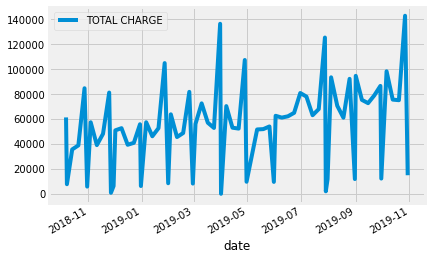

In [26]:
df.plot()

In [41]:
import itertools 

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 6)
SARIMAX: (0, 0, 1) x (0, 1, 0, 6)
SARIMAX: (0, 1, 0) x (0, 1, 1, 6)
SARIMAX: (0, 1, 0) x (1, 0, 0, 6)


In [83]:

for param in pdq:
    for param_seasonal in seasonal_pdq:
            mod = sm.tsa.statespace.SARIMAX(df,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}6 - AIC:{}'.format(param, param_seasonal, results.aic))

ARIMA(0, 0, 0)x(0, 0, 0, 6)6 - AIC:1726.4667191813282
ARIMA(0, 0, 0)x(0, 0, 1, 6)6 - AIC:1560.2089640187648
ARIMA(0, 0, 0)x(0, 1, 0, 6)6 - AIC:1519.8365104724542
ARIMA(0, 0, 0)x(0, 1, 1, 6)6 - AIC:1362.3336738184105
ARIMA(0, 0, 0)x(1, 0, 0, 6)6 - AIC:1540.753511217492
ARIMA(0, 0, 0)x(1, 0, 1, 6)6 - AIC:1507.0750276430756
ARIMA(0, 0, 0)x(1, 1, 0, 6)6 - AIC:1387.7606848142352
ARIMA(0, 0, 0)x(1, 1, 1, 6)6 - AIC:1364.3282844884936
ARIMA(0, 0, 1)x(0, 0, 0, 6)6 - AIC:1685.36912332933
ARIMA(0, 0, 1)x(0, 0, 1, 6)6 - AIC:1530.875494488975
ARIMA(0, 0, 1)x(0, 1, 0, 6)6 - AIC:1489.742307061234
ARIMA(0, 0, 1)x(0, 1, 1, 6)6 - AIC:1335.7764981518926
ARIMA(0, 0, 1)x(1, 0, 0, 6)6 - AIC:1565.1334143995487
ARIMA(0, 0, 1)x(1, 0, 1, 6)6 - AIC:1513.778606590236
ARIMA(0, 0, 1)x(1, 1, 0, 6)6 - AIC:1381.7072983075154
ARIMA(0, 0, 1)x(1, 1, 1, 6)6 - AIC:1336.6998148728917
ARIMA(0, 1, 0)x(0, 0, 0, 6)6 - AIC:1669.4653956643656
ARIMA(0, 1, 0)x(0, 0, 1, 6)6 - AIC:1525.4937824303831
ARIMA(0, 1, 0)x(0, 1, 0, 6)6 - AIC

In [84]:
mod = sm.tsa.statespace.SARIMAX(df,
                                order=(3, 0, 2),
                                seasonal_order=(1, 2, 1, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
#ARIMA(1, 1, 1)x(1, 1, 1, 6)6 - AIC:1318.9307211981547
results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4945      0.356      4.199      0.000       0.797       2.192
ar.L2         -0.5559      0.632     -0.880      0.379      -1.794       0.682
ar.L3          0.0269      0.387      0.069      0.945      -0.732       0.786
ma.L1         -1.9405      0.123    -15.779      0.000      -2.182      -1.699
ma.L2          0.9565      0.115      8.291      0.000       0.730       1.183
ar.S.L6       -0.2872      0.486     -0.591      0.555      -1.240       0.666
ma.S.L6       -0.9672      0.233     -4.142      0.000      -1.425      -0.510
sigma2      3.321e+09   6.76e-11   4.92e+19      0.000    3.32e+09    3.32e+09


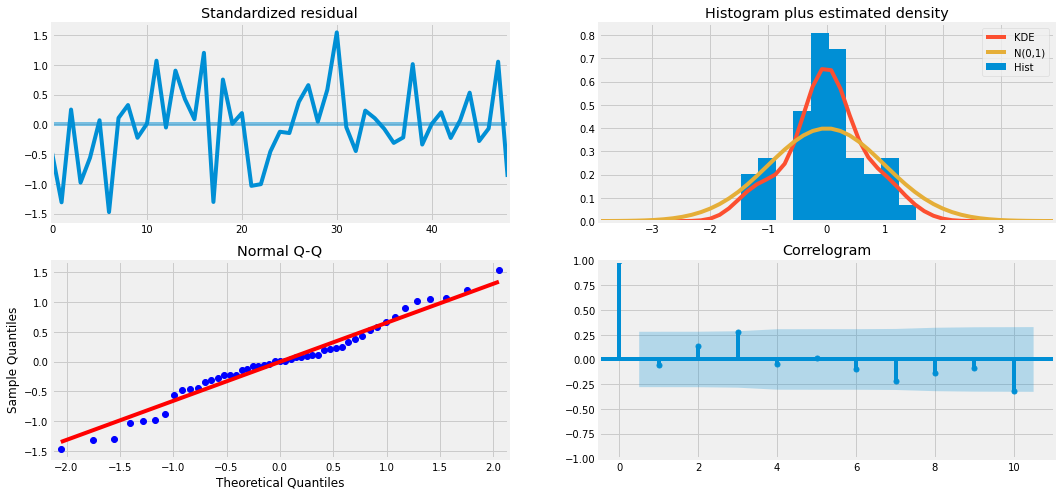

In [85]:

results.plot_diagnostics(figsize=(16, 8))
plt.show()

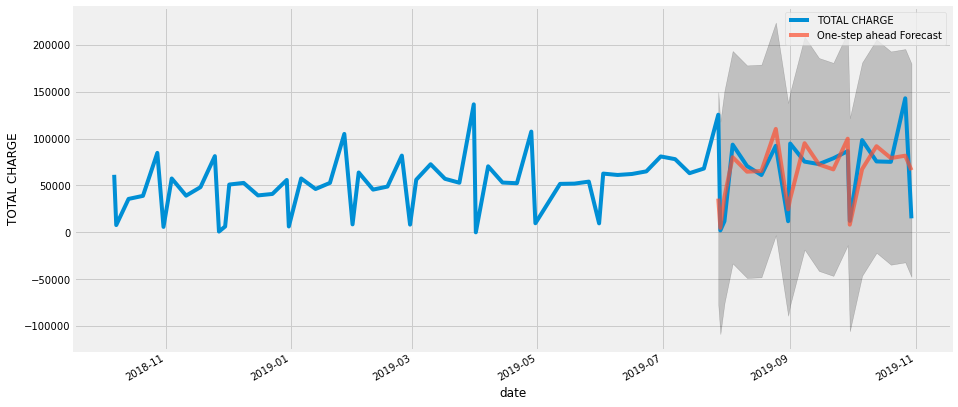

In [86]:
pred = results.get_prediction(start=pd.to_datetime('2019-07-28'), dynamic=False)
pred_ci = pred.conf_int()

ax = df['2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('date')
ax.set_ylabel('TOTAL CHARGE')
plt.legend()

plt.show()

In [87]:
from sklearn.metrics import mean_absolute_error
y_forecasted = pred.predicted_mean
y_forecasted = pd.DataFrame(data = y_forecasted).to_numpy()
y_truth = df['2019-07-28':].to_numpy()

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

# Compute the mean absolute error
mae = mean_absolute_error(y_truth, y_forecasted)

The Mean Squared Error of our forecasts is 1113669649.67


In [88]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
print('The Root Mean AbsoluteError of our forecasts is', mae)

The Root Mean Squared Error of our forecasts is 33371.69
The Root Mean AbsoluteError of our forecasts is 23365.62475279117


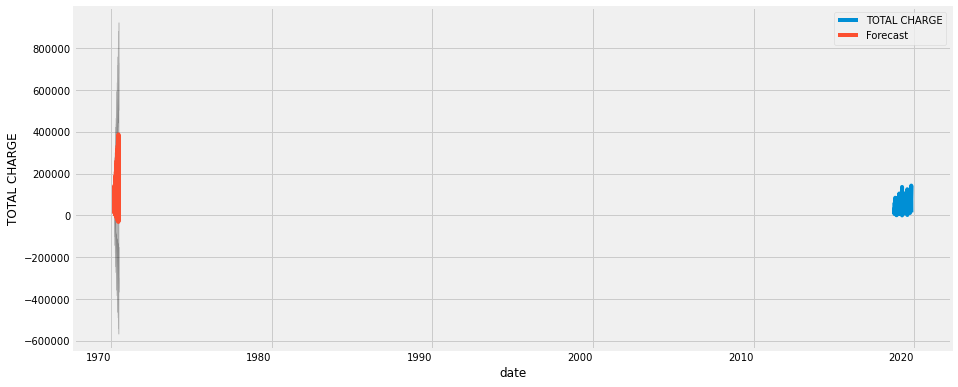

In [89]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = df.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('date')
ax.set_ylabel('TOTAL CHARGE')

plt.legend()
plt.show()